In [142]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [143]:
df = pd.DataFrame()

In [144]:
df['x1'] = [1,2,3,4,5,6,6,7,9,9]
df['x2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [145]:
df.head()

,x1,x2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0


<Axes: xlabel='x1', ylabel='x2'>

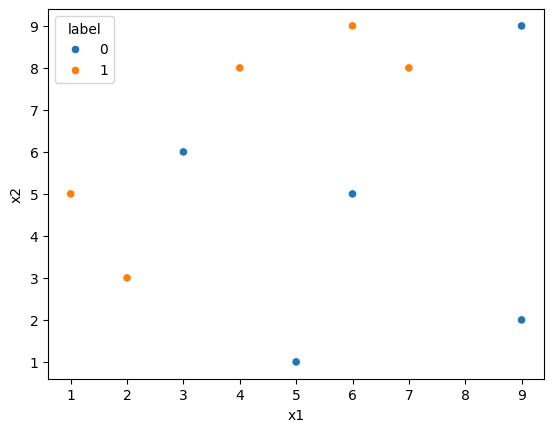

In [146]:
import seaborn as sns
sns.scatterplot(x = df['x1'], y = df['x2'], hue = df['label'])

In [147]:
df['weights'] = 1 / df.shape[0]

In [148]:
df.head()

,x1,x2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1


In [149]:
from sklearn.tree import DecisionTreeClassifier

In [150]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [151]:
x = df.iloc[:, 0:2].values
y = df.iloc[:, 2].values

In [152]:
dt1.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

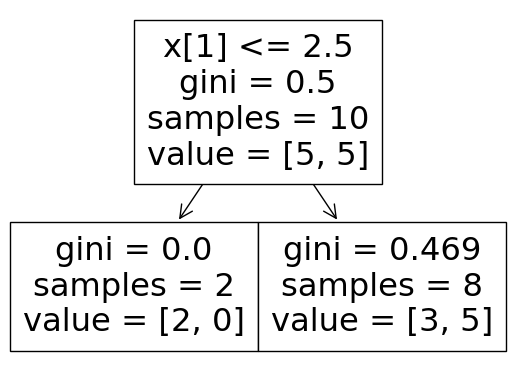

In [153]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

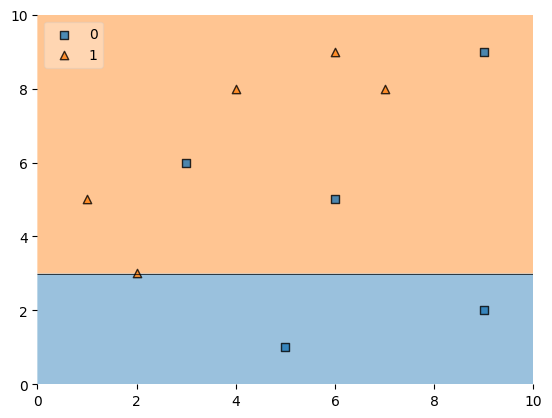

In [154]:
plot_decision_regions(x, y, clf = dt1, legend = 2)

In [155]:
df['y_pred'] = dt1.predict(x)

In [156]:
df

,x1,x2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [157]:
def calculate_model_weights(error):
    return 0.5*np.log((1-error)/(error))

In [158]:
#Step - 3 calculate model weights
alpha1 = calculate_model_weights(0.3)
alpha1.round(4)

0.4236

In [159]:
#Step 4 - Update weights
def update_row_weights(row, alpha = 0.423):
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else: 
        return row['weights'] * np.exp(alpha)

In [160]:
df['updated_weights'] = df.apply(update_row_weights, axis = 1)

In [161]:
df.head()

,x1,x2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508


In [162]:
df['normalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [163]:
df.head()

,x1,x2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475


In [164]:
df['normalized_weights'].sum()

1.0

In [165]:
df['cumsum_upper'] = np.cumsum(df['normalized_weights'])

In [166]:
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']

In [167]:
df.head()

,x1,x2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,0.1,1,0.152653,0.166559,0.309508,0.142950
3,4,8,1,0.1,1,0.065508,0.071475,0.380983,0.309508
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983


In [168]:
import numpy as np

def create_new_dataset(df):
    indices = []
    for i in range(df.shape[0]):  # Assuming the shape[0] is the correct dimension
        a = np.random.random()
        for index, row in df.iterrows():
            if row['cumsum_upper'] > a and a > row['cumsum_lower']:
                indices.append(index)
    return indices

In [169]:
index_values = create_new_dataset(df)
index_values

[3, 8, 4, 9, 6, 8, 4, 6, 8, 5]

In [170]:
second_df = df.iloc[index_values, [0, 1, 2, 3]]
second_df

,x1,x2,label,weights
3,4,8,1,0.1
8,9,9,0,0.1
4,5,1,0,0.1
9,9,2,0,0.1
6,6,5,0,0.1
8,9,9,0,0.1
4,5,1,0,0.1
6,6,5,0,0.1
8,9,9,0,0.1
5,6,9,1,0.1


In [171]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [172]:
x = second_df.iloc[:, 0:2].values
y = second_df.iloc[:, 2].values

In [173]:
dt2.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 4.5\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.25, 'gini = 0.198\nsamples = 9\nvalue = [8, 1]')]

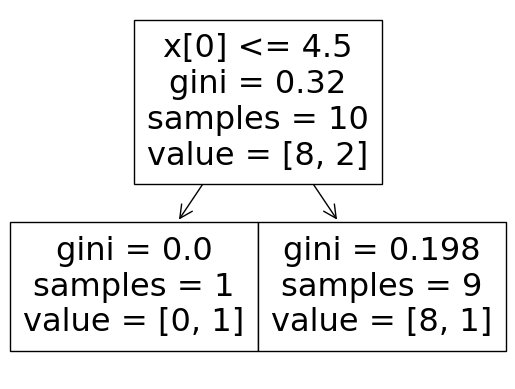

In [174]:
from sklearn.tree import plot_tree
plot_tree(dt2)

<Axes: >

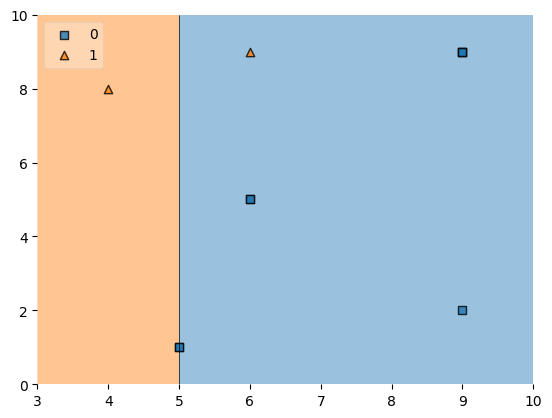

In [175]:
plot_decision_regions(x, y, clf = dt2, legend = 2)

In [176]:
second_df['y_pred'] = dt2.predict(x)
second_df

,x1,x2,label,weights,y_pred
3,4,8,1,0.1,1
8,9,9,0,0.1,0
4,5,1,0,0.1,0
9,9,2,0,0.1,0
6,6,5,0,0.1,0
8,9,9,0,0.1,0
4,5,1,0,0.1,0
6,6,5,0,0.1,0
8,9,9,0,0.1,0
5,6,9,1,0.1,0


In [177]:
alpha2 = calculate_model_weights(0.2)
alpha2

0.6931471805599453

In [178]:
#Step 4 - Update weights
def update_row_weights(row, alpha = 0.69):
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else: 
        return row['weights'] * np.exp(alpha)

In [179]:
second_df['updated_weights'] = second_df.apply(update_row_weights, axis = 1)

In [180]:
second_df.head()

,x1,x2,label,weights,y_pred,updated_weights
3,4,8,1,0.1,1,0.050158
8,9,9,0,0.1,0,0.050158
4,5,1,0,0.1,0,0.050158
9,9,2,0,0.1,0,0.050158
6,6,5,0,0.1,0,0.050158


In [181]:
second_df['normalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [182]:
second_df.head()

,x1,x2,label,weights,y_pred,updated_weights,normalized_weights
3,4,8,1,0.1,1,0.050158,0.077072
8,9,9,0,0.1,0,0.050158,0.077072
4,5,1,0,0.1,0,0.050158,0.077072
9,9,2,0,0.1,0,0.050158,0.077072
6,6,5,0,0.1,0,0.050158,0.077072


In [183]:
second_df['cumsum_upper'] = np.cumsum(second_df['normalized_weights'])

In [184]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['normalized_weights']

In [185]:
second_df.head()

,x1,x2,label,weights,y_pred,updated_weights,normalized_weights,cumsum_upper,cumsum_lower
3,4,8,1,0.1,1,0.050158,0.077072,0.077072,0.000000
8,9,9,0,0.1,0,0.050158,0.077072,0.154144,0.077072
4,5,1,0,0.1,0,0.050158,0.077072,0.231216,0.154144
9,9,2,0,0.1,0,0.050158,0.077072,0.308288,0.231216
6,6,5,0,0.1,0,0.050158,0.077072,0.385359,0.308288


In [186]:
index_values_second = create_new_dataset(second_df)
index_values_second

[8, 3, 4, 4, 6, 8, 8, 5, 8, 4]

In [187]:
dt3 = DecisionTreeClassifier(max_depth=1)

In [188]:
x = third_df.iloc[:, 0:2].values
y = third_df.iloc[:, 2].values

In [189]:
third_df = df.iloc[index_values_second, [0, 1, 2, 3]]
third_df

,x1,x2,label,weights
8,9,9,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
4,5,1,0,0.1
6,6,5,0,0.1
8,9,9,0,0.1
8,9,9,0,0.1
5,6,9,1,0.1
8,9,9,0,0.1
4,5,1,0,0.1


In [190]:
dt3.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 8.0\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.25, 0.25, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]')]

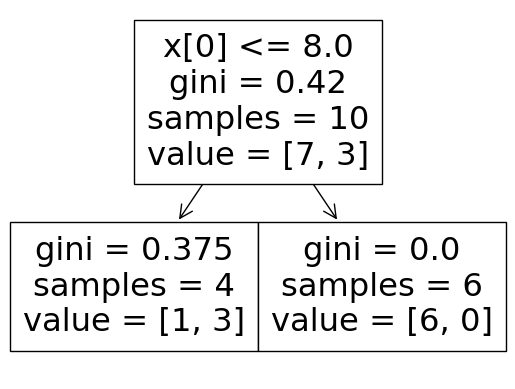

In [191]:
from sklearn.tree import plot_tree
plot_tree(dt3)

<Axes: >

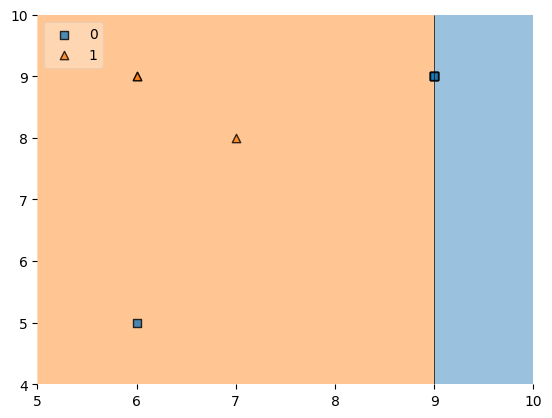

In [192]:
plot_decision_regions(x, y, clf = dt3, legend = 2)

In [193]:
third_df['y_pred'] = dt3.predict(x)
third_df

,x1,x2,label,weights,y_pred
8,9,9,0,0.1,1
3,4,8,1,0.1,0
4,5,1,0,0.1,0
4,5,1,0,0.1,1
6,6,5,0,0.1,1
8,9,9,0,0.1,1
8,9,9,0,0.1,0
5,6,9,1,0.1,0
8,9,9,0,0.1,0
4,5,1,0,0.1,0


In [194]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [195]:
dt2.predict(query)

array([0], dtype=int64)

In [196]:
dt3.predict(query)

array([0], dtype=int64)

In [197]:
alpha1 * (1) + alpha2 * (-1) + alpha3 * (-1)

-1.3681105390344532

In [198]:
np.sign(-1.36)

-1.0